Lab Task: Implement a CNN for Fashion MNIST Classification

**Objective:**
Implement a Convolutional Neural Network (CNN) for image classification using the Fashion MNIST dataset.

**Instructions:**
1. Load and preprocess the Fashion MNIST dataset.
2. Build a CNN model with the following architecture:
   - Input layer
   - Conv2D layer with 32 filters, kernel size of 3x3, and ReLU activation
   - MaxPooling2D layer with pool size of 2x2
   - Conv2D layer with 64 filters, kernel size of 3x3, and ReLU activation
   - MaxPooling2D layer with pool size of 2x2
   - Conv2D layer with 64 filters, kernel size of 3x3, and ReLU activation
   - Flatten layer
   - Dense layer with 64 units and ReLU activation
   - Dense layer with 10 units and softmax activation
3. Compile the model using the Adam optimizer and categorical cross-entropy loss.
4. Train the model for 10 epochs, using the test set for validation.
5. Evaluate the model on the test set and print the test accuracy.
6. Plot the training and validation accuracy over epochs.


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 65s 33ms/step - loss: 0.5135 - accuracy: 0.8111 - val_loss: 0.3791 - val_accuracy: 0.8646
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.3291 - accuracy: 0.8794 - val_loss: 0.3128 - val_accuracy: 0.8884
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2790 - accuracy: 0.8973 - val_loss: 0.2917 - val_accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2478 - accuracy: 0.9083 - val_loss: 0.2836 - val_accuracy: 0.8949
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2255 - accuracy: 0.9171 - val_loss: 0.2732 - val_accuracy: 0.9027
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2048 - accuracy: 0.9243 - val_loss: 0.2689 - val_accuracy: 0.9023
Epoch 7/10
1875/1875 [==============================] - 50s 2

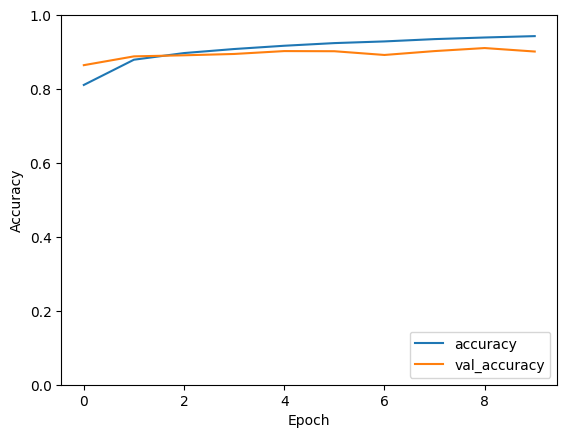

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()